In [8]:
from PIL import Image
import numpy as np
from numpy import asarray
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from matplotlib import pylab
import matplotlib.pyplot as plt
import os
        
def image_matrix():
    imgnamelist =[]
    images = []
    datafolder = Path("/content/drive/MyDrive/project_final")
    for dirpath, dirname, filenames in os.walk(datafolder):
        for name in filenames:
            if name == "FINAL_code.ipynb":
              continue
            img=Image.open(os.path.join(datafolder,name)).convert('L').resize((1024,1024))
            pixels = list(img.getdata()) 
            images.append(pixels)          
        length = len(images)
        images=np.asarray(images)
    return images, length

ar,ar_length=image_matrix()
#print(ar)
#print(ar_length)


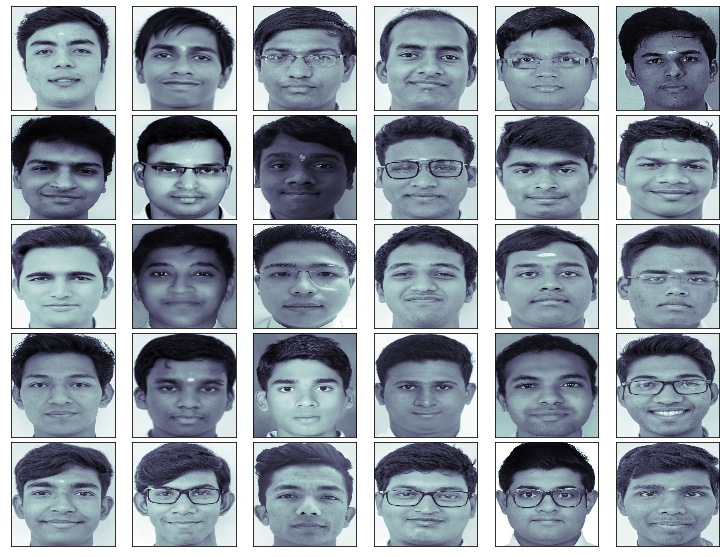

In [9]:
#Initialising the plot where images will be plotted
fig = plt.figure(figsize=(10,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05) 
# ploting all the faces brought down to 1024,1024 pixels
j = 1
np.random.seed(0)
#for i in np.random.choice(range(ar.shape[0]), 25):
for i in range(30): 
    ax = fig.add_subplot(5, 6, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(ar[i,:],(1024,1024)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()



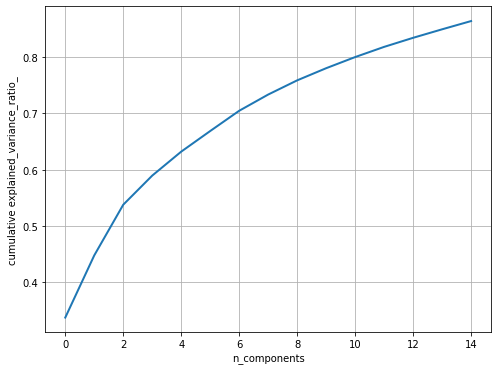

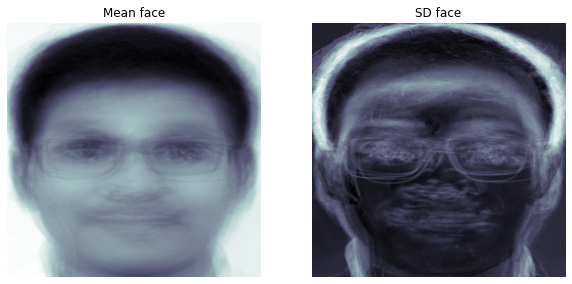

In [10]:

#IMPORTANT PART
n_comp =15

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(ar)
#print(faces_proj.shape)
# (30, 1024)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (1024,1024))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (1024,1024))
pylab.figure(figsize=(8, 6))
pylab.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('SD face')
pylab.show()


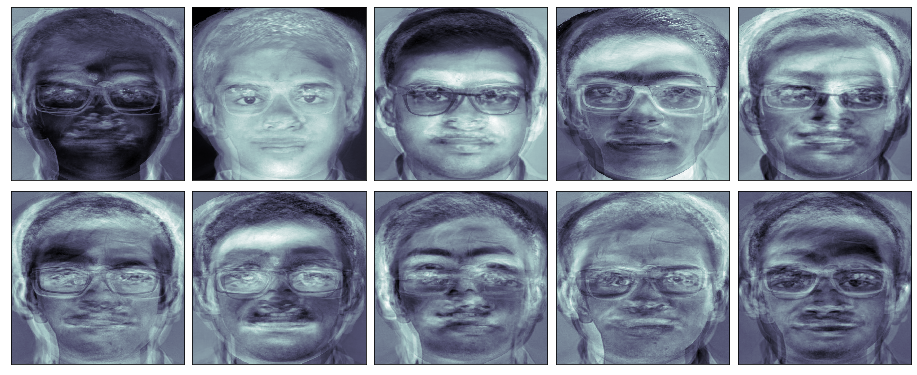

In [11]:
fig = plt.figure(figsize=(10,5)) 
fig.subplots_adjust(left=0, right=1.25, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (1024,1024)), cmap=plt.cm.bone, interpolation='nearest')


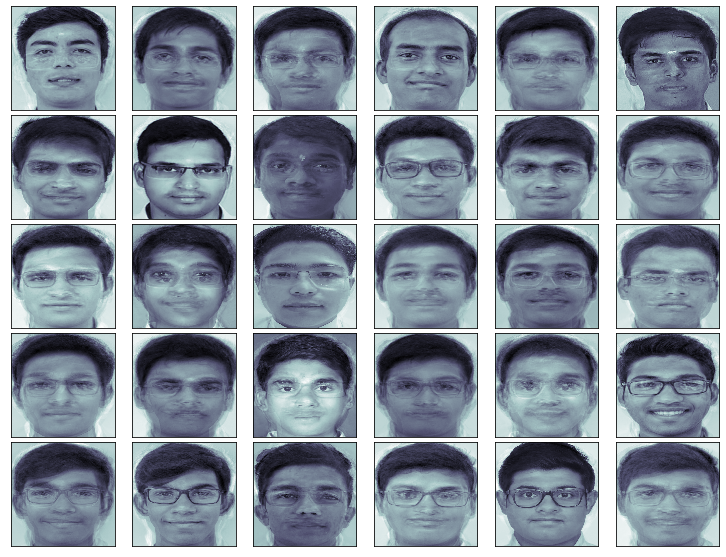

In [12]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 30 images of 1024x1024 dimension 
fig = plt.figure(figsize=(10,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.5, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 1024 by 1024 dimension but 8x8 pixels 
j = 1

for i in range(30):
    ax = fig.add_subplot(5, 6, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(30,1024,1024)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

In [13]:
#print(faces_proj[0,:].shape)
#print(pipeline.named_steps['pca'].components_.shape)
for i in range(30):
    orig_face = np.reshape(ar[i,:], (1024,1024))
    reconst_face = np.reshape(faces_proj[i,:]@pipeline.named_steps['pca'].components_, (1024,1024))
    reconst_face = mean_face + sd_face*reconst_face
    plt.figure(figsize=(5,2.5))
    plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('original', size=20)
    plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('reconstructed', size=20)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.